In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler

## 1. Load Data & Cleaning Awal

In [15]:
df = pd.read_csv('../data/dataset_miniproject.csv')
df.head(20)

,Employee_ID,Age,Gender,Job_Role,Monthly_Income,Job_Satisfaction,Work_Life_Balance,Distance_From_Home_KM,Num_Projects,Avg_Monthly_Hours,Years_at_Company,Years_Since_Last_Promotion,Training_Times_Last_Year,Education_Level,Attrition_Risk_Level
0,EMP-00001,28,Male,Manager,5873,2,4,20.5,5,193.6,4,4,2,2,1
1,EMP-00002,45,Male,Data Scientist,11651,3,2,3.3,2,170.1,5,4,2,3,1
2,EMP-00003,44,Female,Software Engineer,8936,4,3,17.3,8,164.4,6,3,6,1,0
3,EMP-00004,22,Female,Data Scientist,6861,3,3,3.8,6,178.3,0,0,0,3,0
4,EMP-00005,23,Female,Data Scientist,6209,4,1,5.6,6,130.4,1,0,3,5,0
5,EMP-00006,21,Female,Sales Executive,4945,3,4,5.9,8,192.4,0,0,4,3,0
6,EMP-00007,49,Female,Data Scientist,10642,3,4,6.4,2,225.9,6,6,2,2,1
7,EMP-00008,35,Female,HR Specialist,10770,3,4,10.7,5,120.0,2,2,1,3,0
8,EMP-00009,34,Female,Analyst,7998,2,1,17.5,2,221.0,0,0,6,3,1
9,EMP-00010,39,Female,Sales Executive,6566,3,3,7.5,8,178.1,0,0,4,3,0


## Menghapus Kolom yang Tidak Perlu

In [32]:
if 'Employee_ID' in df.columns:
    df = df.drop(columns=['Employee_ID'])
df.head()

,Age,Gender,Job_Role,Monthly_Income,Job_Satisfaction,Work_Life_Balance,Distance_From_Home_KM,Num_Projects,Avg_Monthly_Hours,Years_at_Company,Years_Since_Last_Promotion,Training_Times_Last_Year,Education_Level,Attrition_Risk_Level
0,28,Male,Manager,5873,2,4,20.5,5,193.6,4,4,2,2,1
1,45,Male,Data Scientist,11651,3,2,3.3,2,170.1,5,4,2,3,1
2,44,Female,Software Engineer,8936,4,3,17.3,8,164.4,6,3,6,1,0
3,22,Female,Data Scientist,6861,3,3,3.8,6,178.3,0,0,0,3,0
4,23,Female,Data Scientist,6209,4,1,5.6,6,130.4,1,0,3,5,0


## 2. Encoding untuk Analisis Korelasi

In [18]:
df_analysis = df.copy()

le = LabelEncoder()
cat_cols = ['Gender', 'Job_Role']

for col in cat_cols:
    df_analysis[col] = le.fit_transform(df_analysis[col])

print("Data siap untuk analisis korelasi.")

Data siap untuk analisis korelasi.


## 3. Analisis Feature Importance

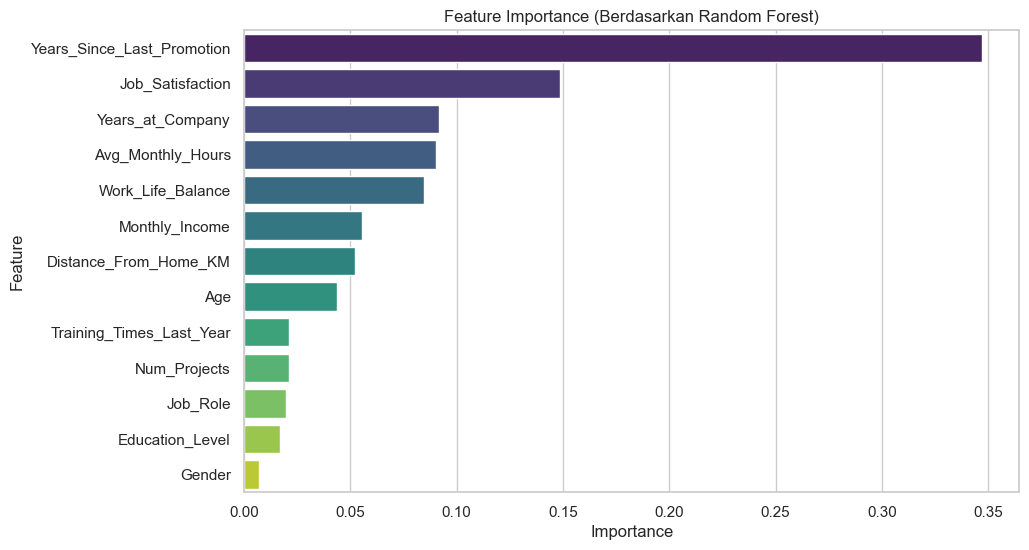

Top Fitur Berpengaruh:
                       Feature  Importance
10  Years_Since_Last_Promotion    0.347257
4             Job_Satisfaction    0.148772
9             Years_at_Company    0.091857
8            Avg_Monthly_Hours    0.090136
5            Work_Life_Balance    0.084577
3               Monthly_Income    0.055605
6        Distance_From_Home_KM    0.052065
0                          Age    0.043733
11    Training_Times_Last_Year    0.021338
7                 Num_Projects    0.021034


In [ ]:
# Pisahkan Fitur (X) dan Target (y)
X_analysis = df_analysis.drop(columns=['Attrition_Risk_Level'])
y_analysis = df_analysis['Attrition_Risk_Level']

# Latih Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_analysis, y_analysis)

# Ambil Feature Importance
importances = rf_model.feature_importances_
feature_names = X_analysis.columns

# Buat DataFrame untuk visualisasi
df_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', hue='Feature', data=df_importance, palette='viridis', legend=False)
plt.title('Feature Importance (Berdasarkan Random Forest)')
plt.show()

print("Top Fitur Berpengaruh:")
print(df_importance.head(10))

## 4. Seleksi Fitur & Penyimpanan Data
Berdasarkan analisis di atas, kita hanya akan mengambil **8 Fitur Teratas** yang memiliki dampak signifikan. Pengurangan fitur ini akan membantu model MLP belajar lebih cepat dan akurat.

**Fitur Terpilih:**
1. Years_Since_Last_Promotion
2. Job_Satisfaction
3. Avg_Monthly_Hours
4. Years_at_Company
5. Work_Life_Balance
6. Monthly_Income
7. Distance_From_Home_KM
8. Age

In [33]:
selected_features = [
    'Years_Since_Last_Promotion',
    'Job_Satisfaction',
    'Avg_Monthly_Hours',
    'Years_at_Company',
    'Work_Life_Balance',
    'Monthly_Income',
    'Distance_From_Home_KM',
    'Age',
    'Attrition_Risk_Level' 
]

df_final = df[selected_features].copy()
# Simpan ke CSV
output_file = 'processed_attrition_data.csv'
df_final.to_csv(output_file, index=False)

print(f"✅ Data berhasil disimpan ke: {output_file}")
print(f"Dimensi Akhir: {df_final.shape}")
df_final.head()

✅ Data berhasil disimpan ke: processed_attrition_data.csv
Dimensi Akhir: (15000, 9)


,Years_Since_Last_Promotion,Job_Satisfaction,Avg_Monthly_Hours,Years_at_Company,Work_Life_Balance,Monthly_Income,Distance_From_Home_KM,Age,Attrition_Risk_Level
0,4,2,193.6,4,4,5873,20.5,28,1
1,4,3,170.1,5,2,11651,3.3,45,1
2,3,4,164.4,6,3,8936,17.3,44,0
3,0,3,178.3,0,3,6861,3.8,22,0
4,0,4,130.4,1,1,6209,5.6,23,0


## 5. Simpan Data Full (Untuk Analisis Lanjutan)

In [28]:
df.to_csv('full_data_cleaned.csv', index=False)
print("✅ Data Full berhasil disimpan ke: full_data_cleaned.csv")

✅ Data Full berhasil disimpan ke: full_data_cleaned.csv
